In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

### Moving Average models:

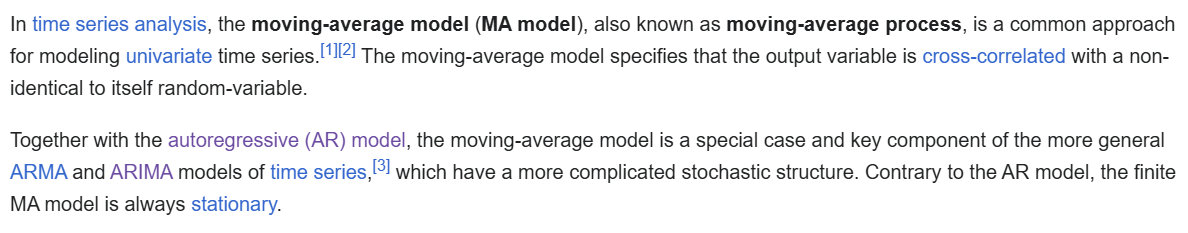
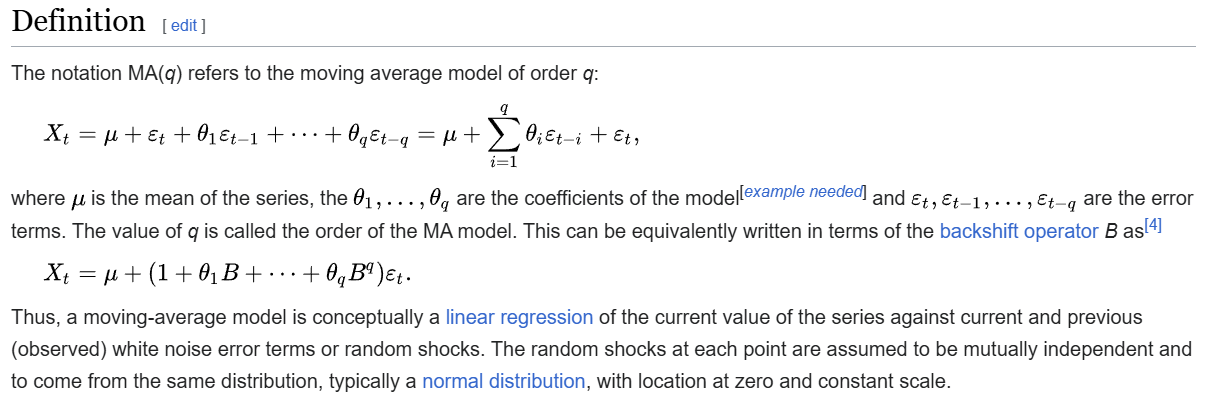

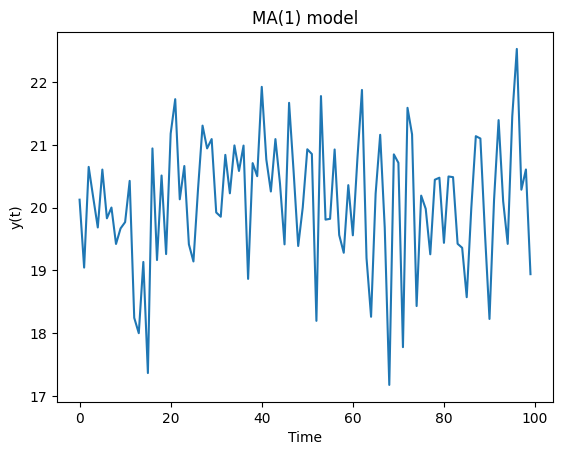

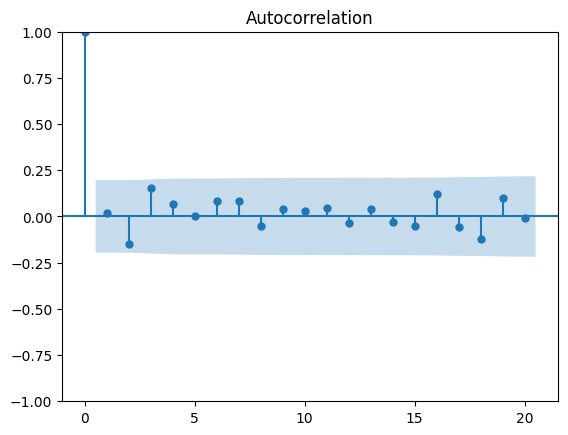

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def MAmodel(theta, c, n_simulations=100):
    epsilon = [np.random.normal(0, 1)]
    yt = [c + epsilon[0]]

    for i in range(1, n_simulations): #from the second position to the last
        epsilon.append(np.random.normal(0, 1)) #every iteration we add a new random number to the list
        yt.append(c + epsilon[i] + theta * epsilon[i-1]) #every iteration we add a new value to the list, which is 
                                                         #the sum of the constant, the random number and the product 
                                                         # of the previous random number and the theta value

    # Plot the time series
    plt.plot(yt)
    plt.title('MA(1) model')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.show()

    #plot the acf
    plot_acf(yt, lags=20)

    return 

MAmodel(theta=0.1, c=20, n_simulations=100)

## A simpler example with cupcakes:

Every month you bring 10 cupcakes on average to a university party, and every single month the prof. says that you brang the wrong amount of cupcakes (he's a bit crazy...), by a number that's NORMALLY DISTRIBUTED N~(0,1).

As we said, the MA(q) model is defined by the equation:

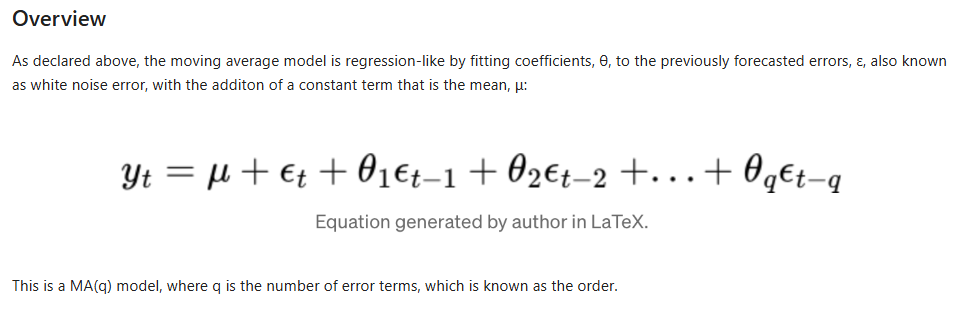

So let's dive into the example with NumPy and Pandas...


EXAMPLE TAKEN FROM https://youtu.be/voryLhxiPzE?feature=shared !!!

In [1]:
#import the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Create the variables and arrays
mu = 10
theta = 0.8
number_of_parties = 50
error_crazyProf = np.random.normal(0, 1, number_of_parties).round(2)
#-----------------------------------------------------------

#this is the cupcakes we should have brang
yt = np.zeros(number_of_parties) #initialize the array with zeros
yt[0] = mu + error_crazyProf[0] #the first value is the mean plus the first random number

for i in range(1, number_of_parties): #from the second position to the last
    yt[i] = mu + theta * error_crazyProf[i-1] + error_crazyProf[i] #every iteration we add a new value to the list, which is 
                                                                 #the sum of the constant, the random number and the product 
                                                                 # of the previous random number and the theta


#this is the forecast of the cupcakes we want to bring this time
yt_forecasted = np.zeros(number_of_parties) #initialize the array with zeros
yt_forecasted[0] = mu

for i in range(1, number_of_parties): #from the second position to the last
    yt_forecasted[i] = mu + theta * error_crazyProf[i-1] #every iteration we add a new value to the list, which is 
                                                         #the sum of the constant, the random number and the product 
                                                         # of the previous random number and the theta


#put the values in a dataframe
df = pd.DataFrame({'yt (the cupcakes we should have brang)': yt, 'error (the gravity of our mistake)': error_crazyProf,
                    'yt_forecasted (the cupcakes we bring this time)': yt_forecasted})

df

,yt (the cupcakes we should have brang),error (the gravity of our mistake),yt_forecasted (the cupcakes we bring this time)
0,8.370,-1.63,10.000
1,8.016,-0.68,8.696
2,9.386,-0.07,9.456
3,9.974,0.03,9.944
4,10.254,0.23,10.024
5,12.174,1.99,10.184
6,12.072,0.48,11.592
7,10.274,-0.11,10.384
8,9.402,-0.51,9.912
9,9.452,-0.14,9.592


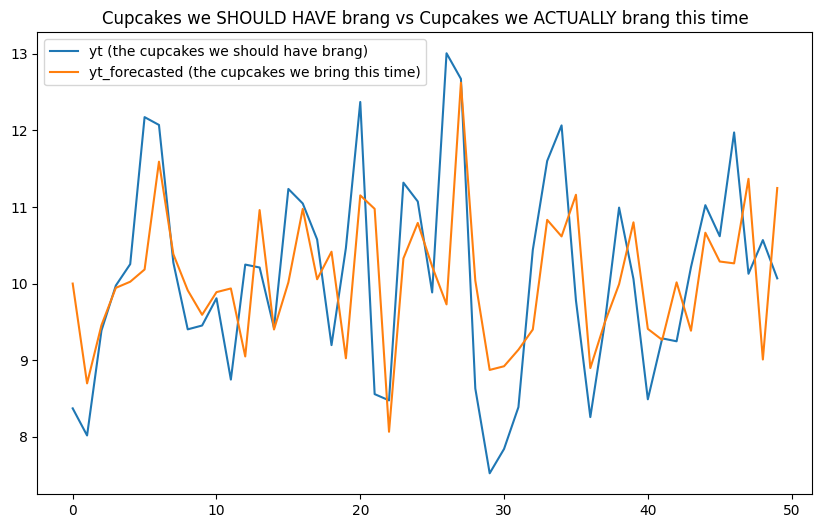

In [45]:
plt.figure(figsize=(10,6)) #specify the size of the plot before plotting! Always do this!
plt.plot(yt, label='yt (the cupcakes we should have brang)')
plt.plot(yt_forecasted, label='yt_forecasted (the cupcakes we bring this time)')
plt.title('Cupcakes we SHOULD HAVE brang vs Cupcakes we ACTUALLY brang this time')
plt.legend()
plt.show()